In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_preprocessado.csv', names=['#Gravidezes', 'Glicose', 'PD', 'DobraTriceps', 'Insulina', 'IMC', 'DiabetesPedigreeFunction', 'Idade', 'Classe'])

In [2]:
df.head()

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPedigreeFunction,Idade,Classe
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [3]:
df.isnull().values.any()

False

In [4]:
pd.set_option('display.max_columns', 10)

In [5]:
df.describe()

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPedigreeFunction,Idade,Classe
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Tratando os valoes inconsistentes

print('Estatisticas Descritivas:')
print(df.describe())
print('\nContando os zeros na amostra:\n')
print(f'Número de gravidezes: {(df["#Gravidezes"]==0).sum()}')
print(f'Glicose: {(df["Glicose"]==0).sum()}')
print(f'Pressão diastólica: {(df["PD"]==0).sum()}')
print(f'Espessura da dobra do tríceps: {(df["DobraTriceps"]==0).sum()}')
print(f'Insulina: {(df["Insulina"]==0).sum()}')
print(f'IMC: {(df["IMC"]==0).sum()}')
print(f'Idade: {(df["Idade"]==0).sum()}')

Estatisticas Descritivas:
       #Gravidezes     Glicose          PD  DobraTriceps    Insulina  \
count   392.000000  392.000000  392.000000    392.000000  392.000000   
mean      3.301020  122.627551   70.663265     29.145408  156.056122   
std       3.211424   30.860781   12.496092     10.516424  118.841690   
min       0.000000   56.000000   24.000000      7.000000   14.000000   
25%       1.000000   99.000000   62.000000     21.000000   76.750000   
50%       2.000000  119.000000   70.000000     29.000000  125.500000   
75%       5.000000  143.000000   78.000000     37.000000  190.000000   
max      17.000000  198.000000  110.000000     63.000000  846.000000   

              IMC  DiabetesPedigreeFunction       Idade      Classe  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000  

In [7]:
print(f'Linhas antes da exclusão: {len(df)}')
excluir_glicose_0 = df.index[df.Glicose == 0].tolist()
excluir_pd_0 = df.index[df['PD'] == 0].tolist()

excluir_triceps_0 = df.index[df.DobraTriceps == 0].tolist()
excluir_insulina_0 = df.index[df.Insulina == 0].tolist()
excluir_imc_0 = df.index[df.IMC == 0].tolist()
temp = excluir_glicose_0
temp += excluir_pd_0
temp += excluir_pd_0
temp += excluir_triceps_0
temp += excluir_insulina_0
temp += excluir_imc_0

df = df.drop(df.index[temp])
classe_0 = len(df[df['Classe'] == 0])
classe_1 = len(df[df['Classe'] == 1])
print(f'Linhas após a exclusao: {len(df)}')

print(f'Pessoas COM diabetes na amostra: {classe_0} ({(classe_0 * 100 / (classe_0 + classe_1)):.2f}%)')
print(f'Pessoas SEM diabetes na amostra: {classe_1} ({(classe_1 * 100 / (classe_0 + classe_1)):.2f}%)')


df.to_csv('diabetes_preprocessado.csv', header=False)

Linhas antes da exclusão: 392
Linhas após a exclusao: 392
Pessoas COM diabetes na amostra: 262 (66.84%)
Pessoas SEM diabetes na amostra: 130 (33.16%)


In [8]:
df = pd.read_csv("diabetes_preprocessado.csv", names=['#Gravidezes', \
                                        'Glicose', 'PD', \
                                        'DobraTricepes', 'Insulina', 'IMC', \
                                        'DiabetesPedigreeFunction', 'Idade', \
                                        'Classe'])

<Axes: xlabel='classe'>

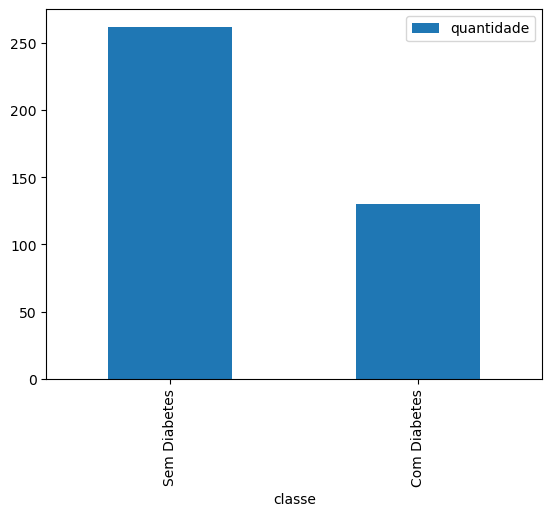

In [9]:
df_classe = pd.DataFrame({'classe':['Sem Diabetes', 'Com Diabetes'], 'quantidade':[len(df[df['Classe'] == 0]), len(df[df['Classe'] == 1])]})
df_classe.plot(kind='bar', x='classe', y='quantidade')

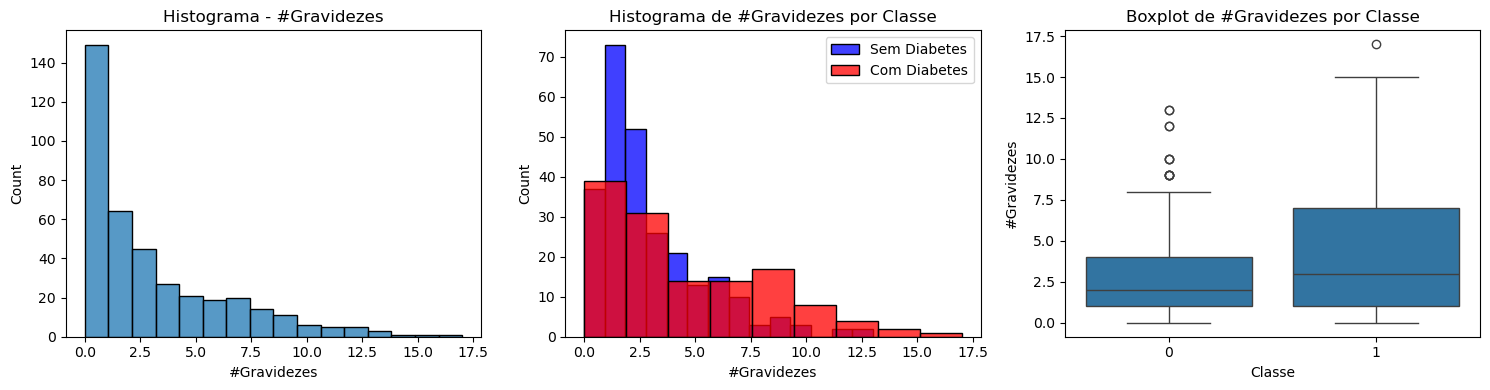

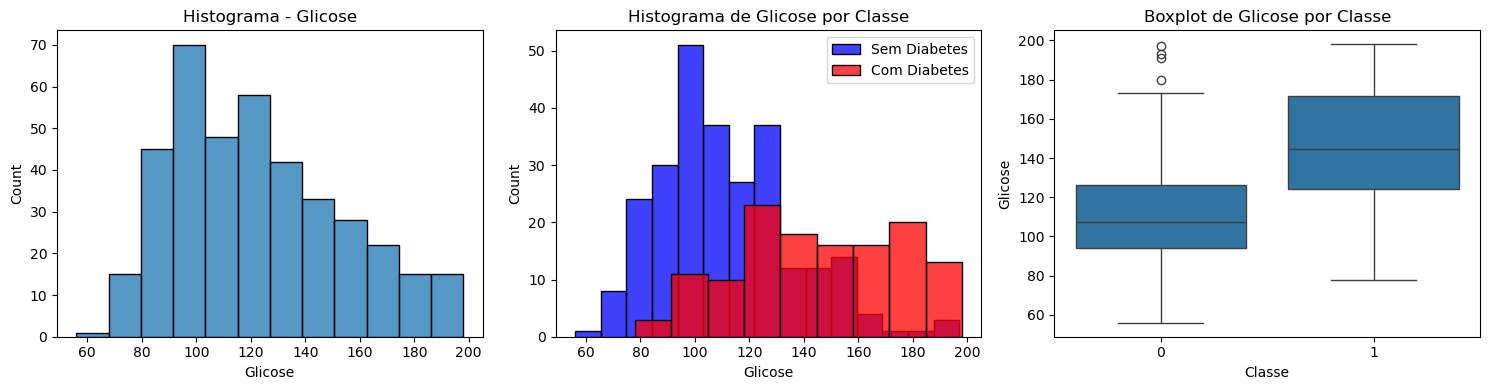

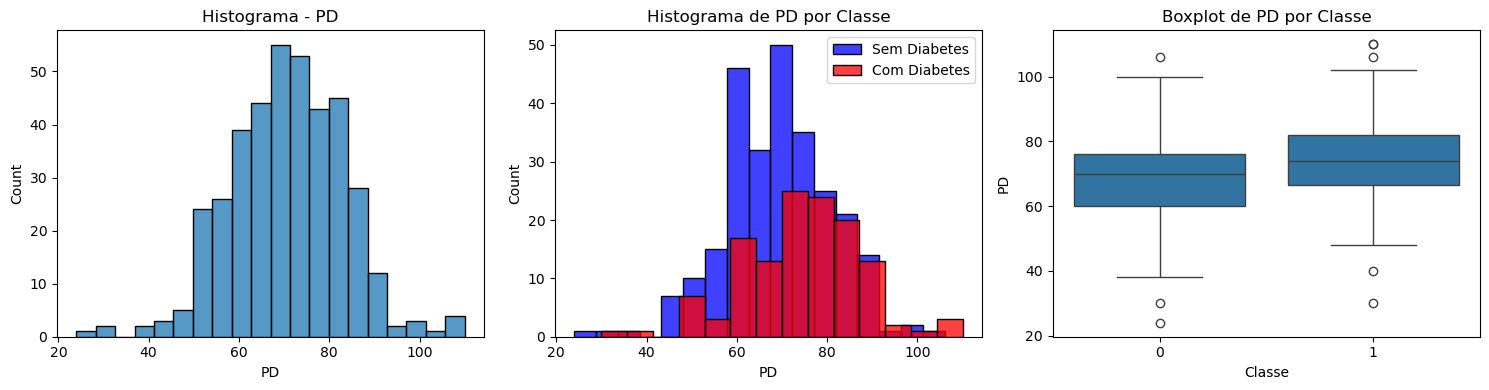

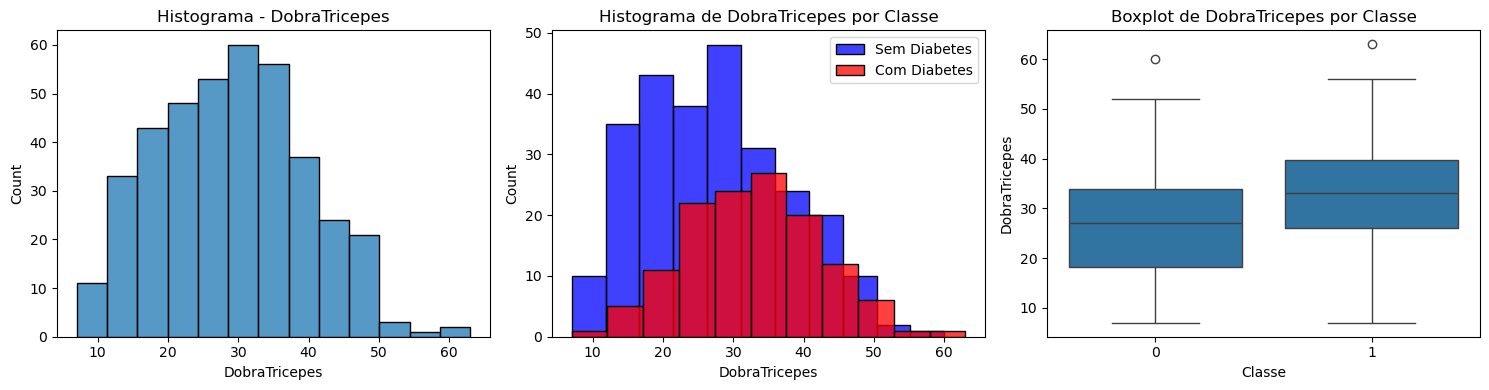

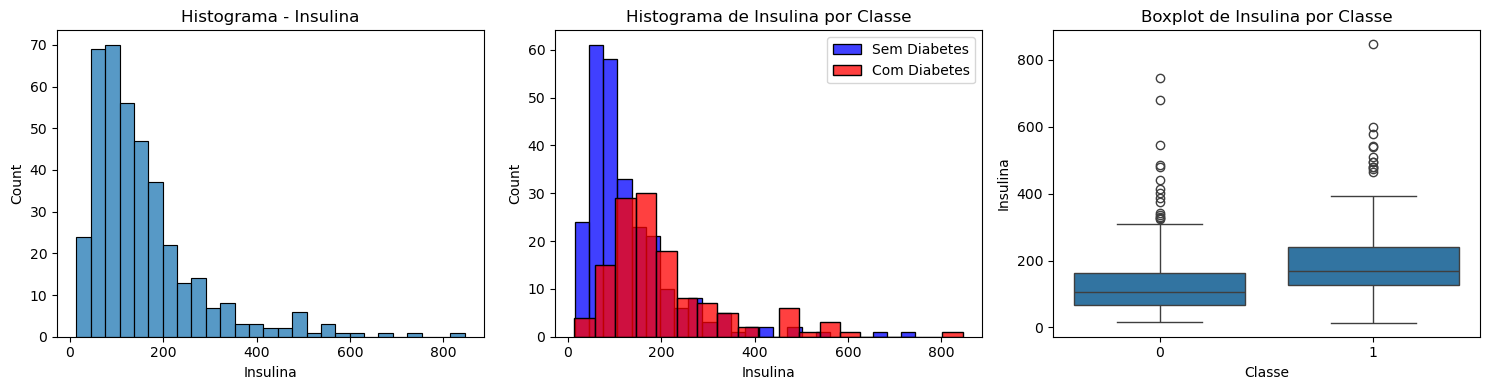

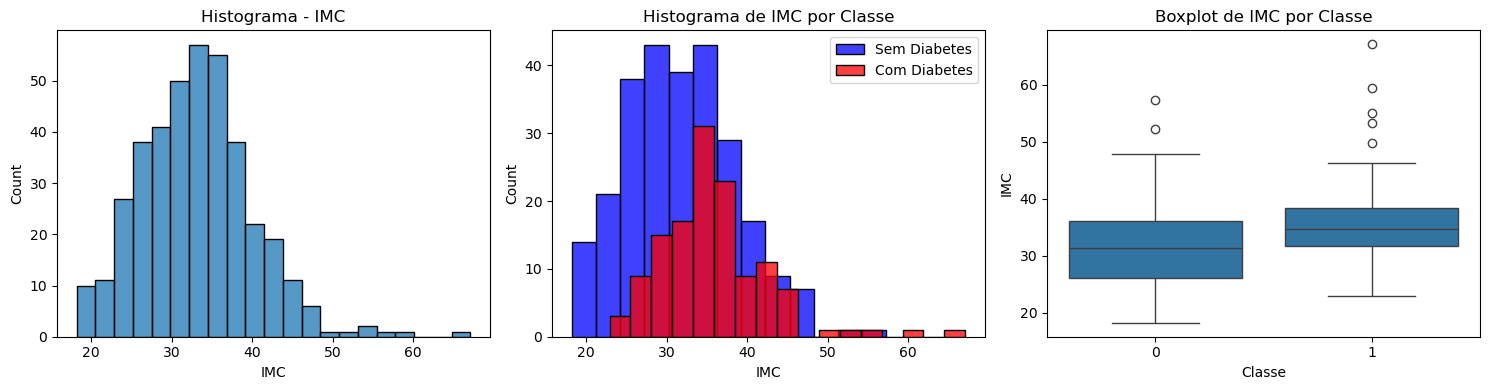

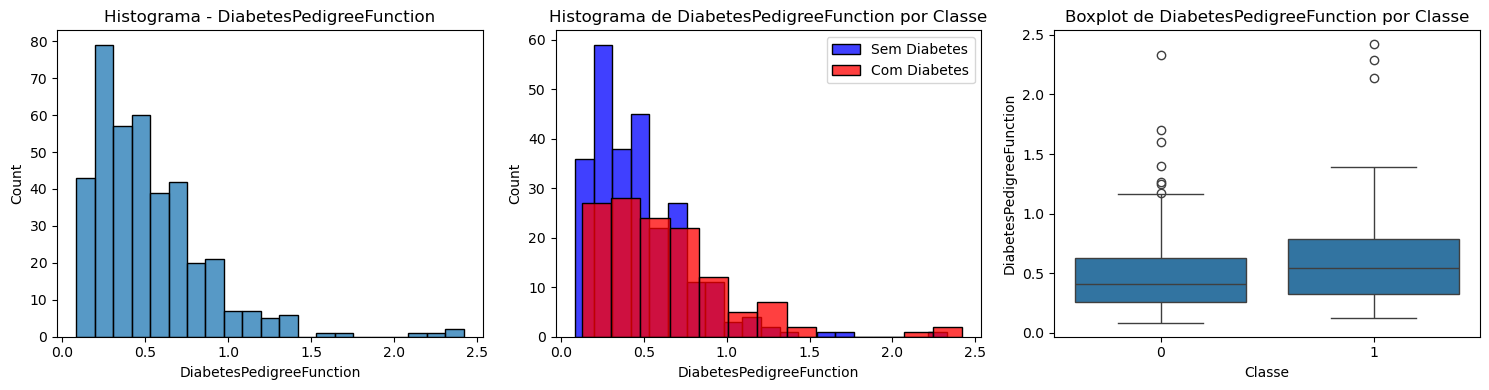

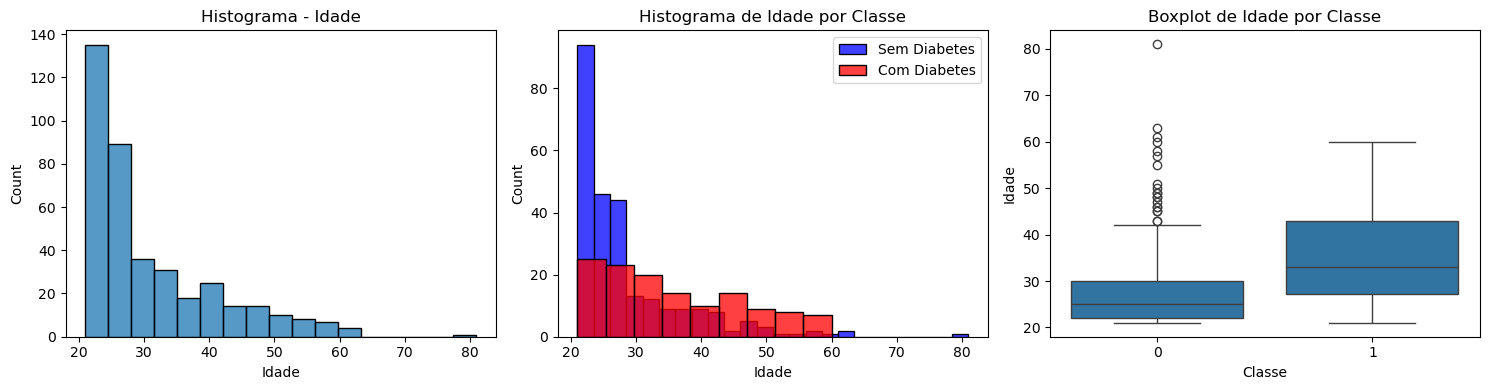

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados (mantive o seu caminho original)
df = pd.read_csv(r"C:\Users\gusta\OneDrive\Estudo Ciencia de Dados\C13\diabetes_preprocessado.csv", names=['#Gravidezes', 
                                        'Glicose', 'PD', 
                                        'DobraTricepes', 'Insulina', 'IMC', 
                                        'DiabetesPedigreeFunction', 'Idade', 
                                        'Classe'])

# Separar os dataframes por classe
com_diabetes = df[df.Classe==1]
sem_diabetes = df[df.Classe==0]

# Loop para gerar os gráficos para cada variável
for variavel in df.columns:
    if variavel != 'Classe':
        # Cria a figura para os 3 gráficos
        plt.figure(figsize=(15, 4)) # Aumentei um pouco a largura para melhor visualização

        # 1. Histograma da variável (Amostra completa)
        plt.subplot(1, 3, 1)
        plt.title('Histograma - ' + variavel)
        # CORREÇÃO: troquei distplot por histplot
        sns.histplot(df[variavel], kde=False)

        # 2. Histograma por classe
        plt.subplot(1, 3, 2)
        plt.title("Histograma de " + variavel + " por Classe")
        # CORREÇÃO: troquei distplot por histplot e melhorei a legenda
        sns.histplot(sem_diabetes[variavel], color="Blue", label="Sem Diabetes", kde=False)
        sns.histplot(com_diabetes[variavel], color="Red", label="Com Diabetes", kde=False)
        plt.legend() # Gera a legenda automaticamente a partir dos labels definidos no histplot

        # 3. Boxplot por classe
        plt.subplot(1, 3, 3)
        plt.title("Boxplot de " + variavel + " por Classe")
        # CORREÇÃO: removi a linha duplicada
        sns.boxplot(x=df.Classe, y=df[variavel])
        
        # Mostra a figura com os 3 gráficos
        plt.tight_layout() # Ajusta os subplots para evitar sobreposição de títulos
        plt.show()

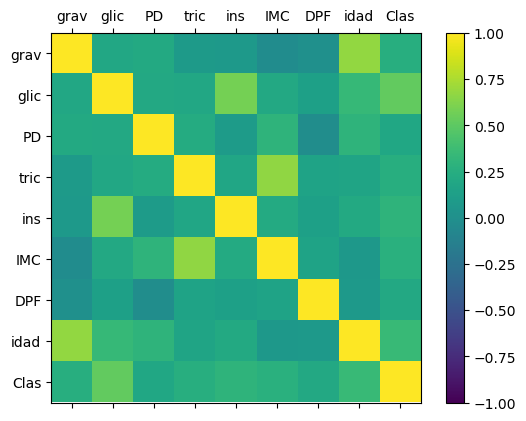

In [11]:
atributos = ['#Gravidezes', 'Glicose', 'PD', 'DobraTriceps', 'Insulina', 'IMC', 'DiabetesPedegreeFunction', 'Idade', 'Classe']

df = pd.read_csv('diabetes_preprocessado.csv', names=atributos)
matriz = df.corr()

grafico = plt.figure()

subgrafico = grafico.add_subplot(111) # (111) = 1 linha, 1 coluna, 1 subplot ativo

cax = subgrafico.matshow(matriz, vmin=-1, vmax=1)
grafico.colorbar(cax)
ticks = np.arange(0, 9, 1)
subgrafico.set_xticks(ticks)
subgrafico.set_yticks(ticks)

titulos_abreviados=['grav', 'glic', 'PD', 'tric', 'ins', 'IMC', 'DPF', 'idad', 'Clas']

subgrafico.set_xticklabels(titulos_abreviados)
subgrafico.set_yticklabels(titulos_abreviados)
plt.show()



array([[<Axes: xlabel='#Gravidezes', ylabel='#Gravidezes'>,
        <Axes: xlabel='Glicose', ylabel='#Gravidezes'>,
        <Axes: xlabel='PD', ylabel='#Gravidezes'>,
        <Axes: xlabel='DobraTriceps', ylabel='#Gravidezes'>,
        <Axes: xlabel='Insulina', ylabel='#Gravidezes'>,
        <Axes: xlabel='IMC', ylabel='#Gravidezes'>,
        <Axes: xlabel='DiabetesPedegreeFunction', ylabel='#Gravidezes'>,
        <Axes: xlabel='Idade', ylabel='#Gravidezes'>,
        <Axes: xlabel='Classe', ylabel='#Gravidezes'>],
       [<Axes: xlabel='#Gravidezes', ylabel='Glicose'>,
        <Axes: xlabel='Glicose', ylabel='Glicose'>,
        <Axes: xlabel='PD', ylabel='Glicose'>,
        <Axes: xlabel='DobraTriceps', ylabel='Glicose'>,
        <Axes: xlabel='Insulina', ylabel='Glicose'>,
        <Axes: xlabel='IMC', ylabel='Glicose'>,
        <Axes: xlabel='DiabetesPedegreeFunction', ylabel='Glicose'>,
        <Axes: xlabel='Idade', ylabel='Glicose'>,
        <Axes: xlabel='Classe', ylabel='Glicose'

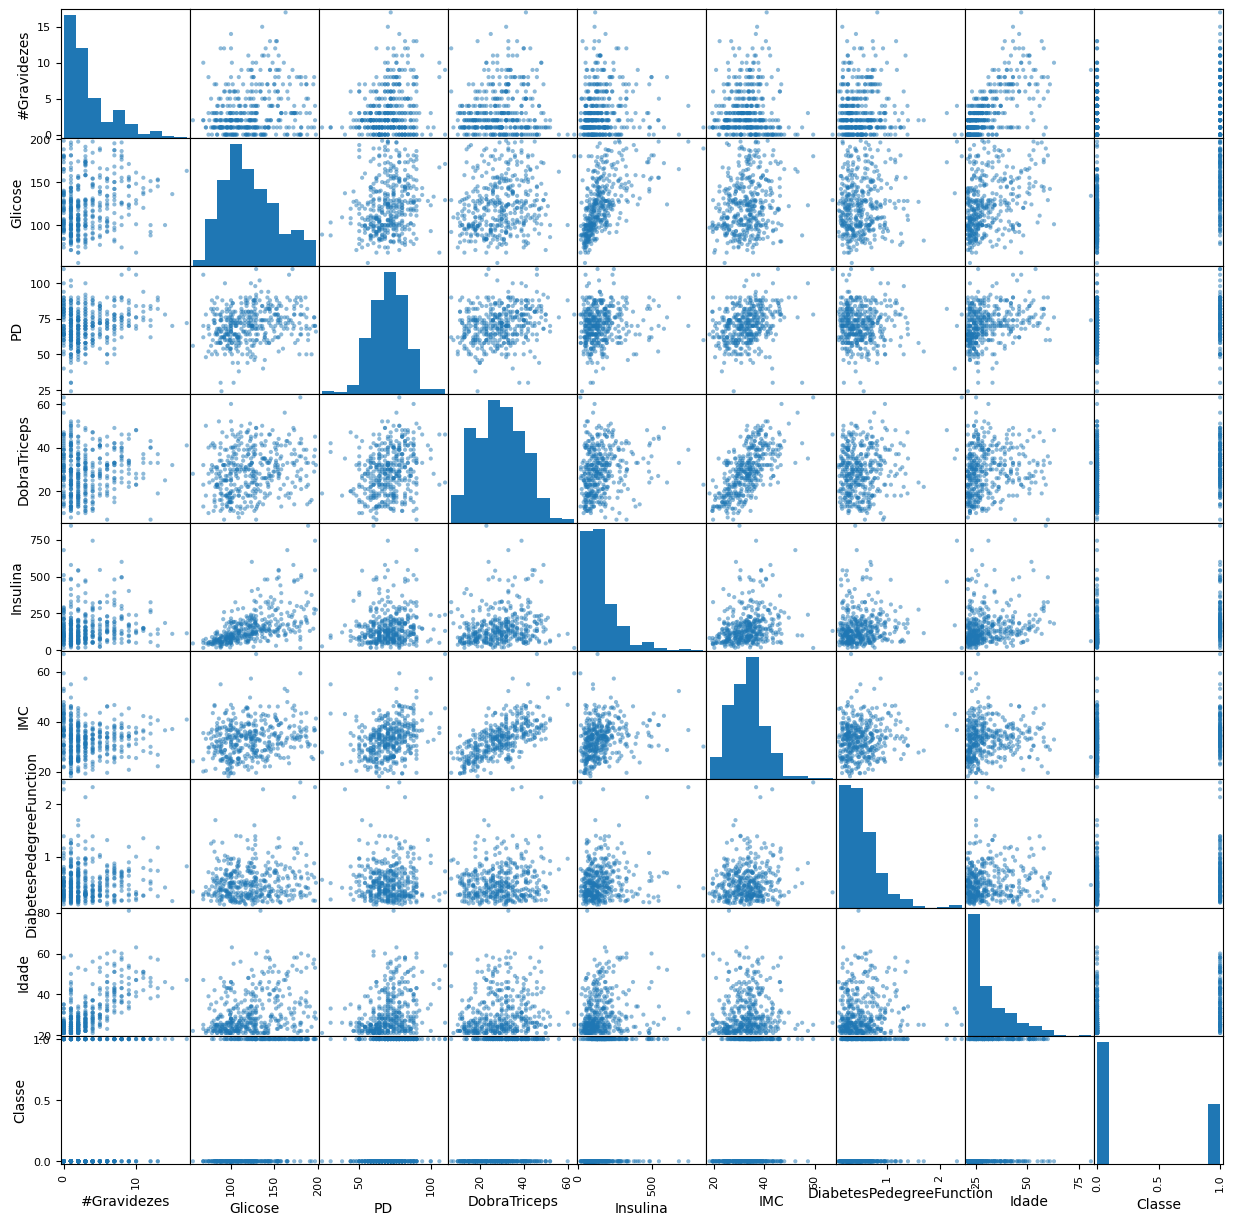

In [12]:
from pandas.plotting import scatter_matrix
df = pd.read_csv('diabetes_preprocessado.csv', names=['#Gravidezes', 'Glicose', 'PD', 'DobraTriceps', 'Insulina', 'IMC', 'DiabetesPedegreeFunction', 'Idade', 'Classe'])

scatter_matrix(df, figsize=(15, 15))

In [13]:
coeficiente = df.corr()
coeficiente

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPedegreeFunction,Idade,Classe
#Gravidezes,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glicose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
PD,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
DobraTriceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulina,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
IMC,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedegreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Idade,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Classe,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000
